In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

In [2]:
file="kaggleData/student-mat.csv"

df=pd.read_csv(file)

print(df.columns)
df.head()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
#create subset of data to analyze
subset_df=pd.DataFrame()
subset_df["Gender"]=df["sex"]
subset_df["Age"]=df["age"]
subset_df["Weekday_Consumption"]=df["Dalc"]
subset_df["Weekend_Consumption"]=df["Walc"]
subset_df["Absences"]=df["absences"]
subset_df["Past_Class_Failures"]=df["failures"]
subset_df["Final_Grade_Math"]=df["G3"]

subset_df.head()


,Gender,Age,Weekday_Consumption,Weekend_Consumption,Absences,Past_Class_Failures,Final_Grade_Math
0,F,18,1,1,6,0,6
1,F,17,1,1,4,0,6
2,F,15,2,3,10,3,10
3,F,15,1,1,2,0,15
4,F,16,1,2,4,0,10


In [5]:
#compare average number of drinks during the week by gender
genderCompare=subset_df.groupby("Gender")['Weekday_Consumption'].mean()
genderCompare

Gender
F    1.254808
M    1.732620
Name: Weekday_Consumption, dtype: float64

In [6]:
#compare average number of drinks during the weekend by gender
genderCompare2=subset_df.groupby("Gender")['Weekend_Consumption'].mean()
genderCompare2

Gender
F    1.956731
M    2.663102
Name: Weekend_Consumption, dtype: float64

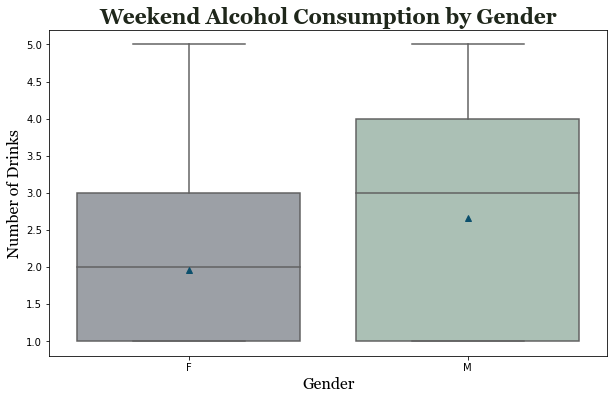

In [7]:
plt.figure(figsize=(10,6))

colors=["#9AA0A8","#A7C4B5","#0B4F6C","#AF1B3F"]
sns.set_palette(sns.color_palette(colors))

sns.boxplot(x="Gender", y="Weekend_Consumption", data=subset_df,showmeans=True)

plt.title("Weekend Alcohol Consumption by Gender", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Gender", fontsize=16,fontname="Georgia")
plt.ylabel("Number of Drinks", fontsize=16,fontname="Georgia")


plt.show()

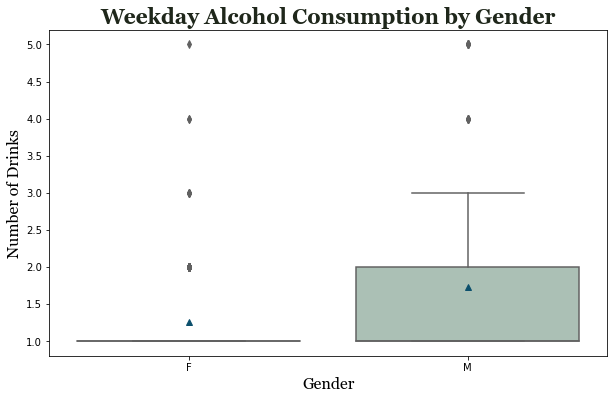

In [8]:
plt.figure(figsize=(10,6))


colors=["#9AA0A8","#A7C4B5","#0B4F6C","#AF1B3F"]
sns.set_palette(sns.color_palette(colors))

sns.boxplot(x="Gender", y="Weekday_Consumption", data=subset_df,showmeans=True)

plt.title("Weekday Alcohol Consumption by Gender", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Gender", fontsize=16,fontname="Georgia")
plt.ylabel("Number of Drinks", fontsize=16,fontname="Georgia")

plt.show()


In [9]:
#looking into female weekday alcohol consumption

femaleDrinks=subset_df.loc[subset_df["Gender"]=="F",["Weekday_Consumption"]]

print(f"On Average females drank {femaleDrinks['Weekday_Consumption'].mean()} drinks during the week")
femaleDrinks["Weekday_Consumption"].value_counts()

On Average females drank 1.2548076923076923 drinks during the week


1    167
2     33
3      5
4      2
5      1
Name: Weekday_Consumption, dtype: int64

In [10]:
#Look at how many drinks on average one consumes on the weekdays by gender and age
ageAnalysis=subset_df.groupby(["Gender","Age"]).Weekday_Consumption.mean()

ageAnalysis

Gender  Age
F       15     1.315789
        16     1.240741
        17     1.241379
        18     1.232558
        19     1.285714
        20     1.000000
M       15     1.386364
        16     1.640000
        17     1.925000
        18     1.897436
        19     1.700000
        20     2.500000
        21     3.000000
        22     5.000000
Name: Weekday_Consumption, dtype: float64

In [11]:
#Look at how many drinks on average one consumes on the weekends by gender and age
ageAnalysis2=subset_df.groupby(["Gender","Age"])["Weekend_Consumption"].mean()

ageAnalysis2

Gender  Age
F       15     1.842105
        16     2.037037
        17     2.120690
        18     1.767442
        19     1.928571
        20     1.000000
M       15     1.954545
        16     2.540000
        17     3.225000
        18     3.128205
        19     2.000000
        20     3.000000
        21     3.000000
        22     5.000000
Name: Weekend_Consumption, dtype: float64

In [12]:
average_drinkbyAge=pd.DataFrame()

average_drinkbyAge["Average Number of Drinks During the Week"]=ageAnalysis
average_drinkbyAge["Average Number of Drinks on the Weekend"]=ageAnalysis2

average_drinkbyAge

Average Number of Drinks During the Week  \
Gender Age                                             
F      15                                   1.315789   
       16                                   1.240741   
       17                                   1.241379   
       18                                   1.232558   
       19                                   1.285714   
       20                                   1.000000   
M      15                                   1.386364   
       16                                   1.640000   
       17                                   1.925000   
       18                                   1.897436   
       19                                   1.700000   
       20                                   2.500000   
       21                                   3.000000   
       22                                   5.000000   

            Average Number of Drinks on the Weekend  
Gender Age                                           
F      15                                  1.842105  
       16                                  2.037037  
       17                                  2.120690  
       18                                  1.767442  
       19                                  1.928571  
       20                                  1.000000  
M      15                                  1.954545  
       16                                  2.540000  
       17                                  3.225000  
       18                                  3.128205  
       19                                  2.000000  
       20                                  3.000000  
       21                                  3.000000  
       22                                  5.000000

In [13]:
corrs=subset_df.corr()
corrs

,Age,Weekday_Consumption,Weekend_Consumption,Absences,Past_Class_Failures,Final_Grade_Math
Age,1.000000,0.131125,0.117276,0.175230,0.243665,-0.161579
Weekday_Consumption,0.131125,1.000000,0.647544,0.111908,0.136047,-0.054660
Weekend_Consumption,0.117276,0.647544,1.000000,0.136291,0.141962,-0.051939
Absences,0.175230,0.111908,0.136291,1.000000,0.063726,0.034247
Past_Class_Failures,0.243665,0.136047,0.141962,0.063726,1.000000,-0.360415
Final_Grade_Math,-0.161579,-0.054660,-0.051939,0.034247,-0.360415,1.000000


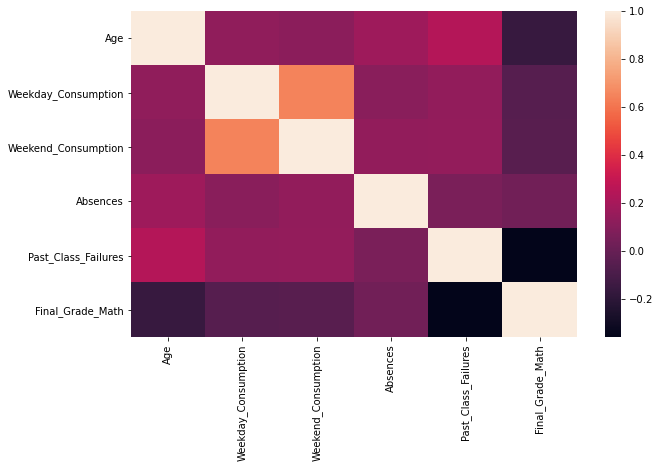

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

y = -0.28x + 10.83


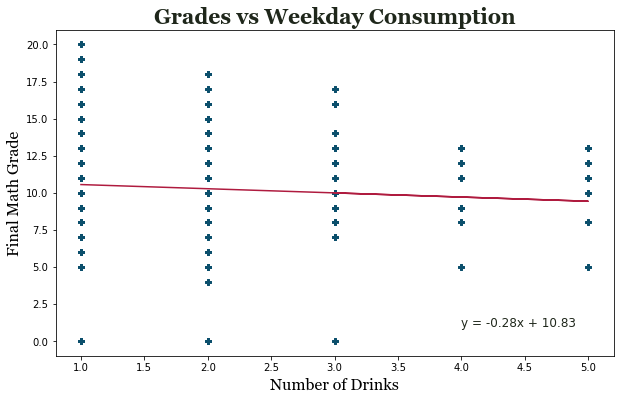

In [15]:
#plot weekday consumption vs final grade in math
target=subset_df["Final_Grade_Math"]
features=subset_df[["Weekday_Consumption","Age","Absences","Past_Class_Failures"]]


(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(features.Weekday_Consumption, target)
regress_values = features.Weekday_Consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
weekdayDrinks=subset_df.Weekday_Consumption
grades=subset_df.Final_Grade_Math

plt.scatter(features.Weekday_Consumption,target,marker="P",color="#0B4F6C")
plt.plot(features.Weekday_Consumption,regress_values,"r-",color="#AF1B3F")

plt.title("Grades vs Weekday Consumption", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.ylabel("Final Math Grade", fontsize=16,fontname="Georgia")
plt.xlabel("Number of Drinks", fontsize=16,fontname="Georgia")
plt.annotate(line_eq,(4,1),fontsize=12,color="#1F271B")


plt.show()

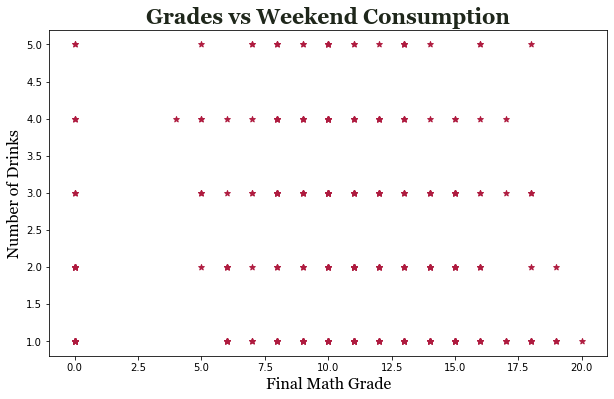

In [16]:
#plot weekend consumption vs final grade in math

plt.figure(figsize=(10,6))
weekdayDrinks=subset_df.Weekend_Consumption
grades=subset_df.Final_Grade_Math

plt.scatter(grades,weekdayDrinks,marker="*",color="#AF1B3F")

plt.title("Grades vs Weekend Consumption", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Final Math Grade", fontsize=16,fontname="Georgia")
plt.ylabel("Number of Drinks", fontsize=16,fontname="Georgia")


plt.show()

In [17]:
target=subset_df["Final_Grade_Math"]
features=subset_df[["Weekend_Consumption","Weekday_Consumption","Age","Absences","Past_Class_Failures"]]


X = sm.add_constant(features)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final_Grade_Math   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     12.74
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.76e-11
Time:                        18:45:02   Log-Likelihood:                -1131.2
No. Observations:                 395   AIC:                             2274.
Df Residuals:                     389   BIC:                             2298.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.3260      2.914      5.602      0.000      10.597      22.055
Weekend_Consumption     0.0013      0.221      0.006      0.995      -0.433       0.435
Weekday_Consumption    -0.0235      0.318     -0.074      0.941      -0.650       0.603
Age                    -0.3240      0.177     -1.830      0.068      -0.672       0.024
Absences                0.0414      0.028      1.505      0.133      -0.013       0.096
Past_Class_Failures    -2.1098      0.301     -7.011      0.000      -2.701      -1.518
==============================================================================
Omnibus:                       27.418   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.108
Skew:                          -0.660   Prob(JB):                     1.76e-07
Kurtosis:                       3.388   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
target=subset_df["Final_Grade_Math"]
features=subset_df[["Weekday_Consumption","Age","Absences","Past_Class_Failures"]]


X = sm.add_constant(features)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final_Grade_Math   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.08e-12
Time:                        18:45:02   Log-Likelihood:                -1131.2
No. Observations:                 395   AIC:                             2272.
Df Residuals:                     390   BIC:                             2292.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.3268      2.907      5.617      0.000      10.612      22.042
Weekday_Consumption    -0.0223      0.246     -0.091      0.928      -0.506       0.461
Age                    -0.3240      0.177     -1.832      0.068      -0.672       0.024
Absences                0.0414      0.027      1.511      0.131      -0.012       0.095
Past_Class_Failures    -2.1097      0.300     -7.034      0.000      -2.699      -1.520
==============================================================================
Omnibus:                       27.433   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.128
Skew:                          -0.660   Prob(JB):                     1.74e-07
Kurtosis:                       3.388   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
target=subset_df["Final_Grade_Math"]
features=subset_df[["Age","Absences","Past_Class_Failures"]]


X = sm.add_constant(features)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final_Grade_Math   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     21.34
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           8.03e-13
Time:                        18:45:02   Log-Likelihood:                -1131.2
No. Observations:                 395   AIC:                             2270.
Df Residuals:                     391   BIC:                             2286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.3191      2.902      5.624      0.000      10.614      22.024
Age                    -0.3254      0.176     -1.849      0.065      -0.671       0.021
Absences                0.0412      0.027      1.511      0.132      -0.012       0.095
Past_Class_Failures    -2.1126      0.298     -7.093      0.000      -2.698      -1.527
==============================================================================
Omnibus:                       27.290   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.938
Skew:                          -0.658   Prob(JB):                     1.91e-07
Kurtosis:                       3.387   Cond. No.                         244.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

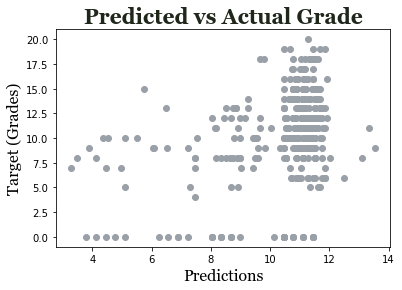

In [20]:
#actual vs predictions
predictions=results.predict()

plt.scatter(predictions,target)

plt.title("Predicted vs Actual Grade", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Predictions", fontsize=16,fontname="Georgia")
plt.ylabel("Target (Grades)", fontsize=16,fontname="Georgia")

plt.show()

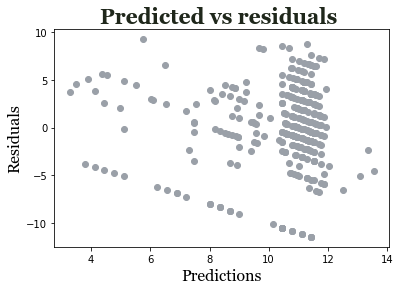

In [21]:
#residual plot

resids=target-predictions

plt.scatter(predictions,resids)

plt.title("Predicted vs residuals ", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Predictions", fontsize=16,fontname="Georgia")
plt.ylabel("Residuals", fontsize=16,fontname="Georgia")

plt.show()

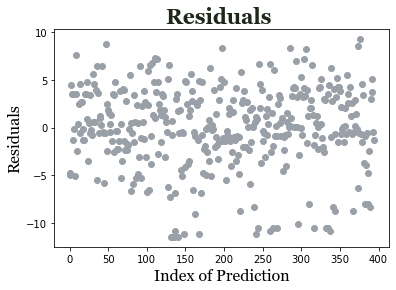

In [22]:
#residual plot
#want to see no correlation in your errors- want to see randomness 

resids=target-predictions

plt.scatter(range(len(resids)),resids)

plt.title("Residuals ", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Index of Prediction", fontsize=16,fontname="Georgia")
plt.ylabel("Residuals", fontsize=16,fontname="Georgia")

plt.show()

In [23]:
#want residual average to be close to 0, check average

resids.mean()

6.080087207263642e-15

In [24]:
target=subset_df["Weekend_Consumption"]
features=subset_df[["Age","Weekday_Consumption"]]


X = sm.add_constant(features)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Weekend_Consumption   R-squared:                       0.420
Model:                             OLS   Adj. R-squared:                  0.417
Method:                  Least Squares   F-statistic:                     142.2
Date:                 Wed, 11 Nov 2020   Prob (F-statistic):           3.77e-47
Time:                         18:45:03   Log-Likelihood:                -552.21
No. Observations:                  395   AIC:                             1110.
Df Residuals:                      392   BIC:                             1122.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3588      0.650      0.552      0.581      -0.919       1.636
Age                     0.0332      0.039      0.849      0.396      -0.044       0.110
Weekday_Consumption     0.9300      0.056     16.583      0.000       0.820       1.040
==============================================================================
Omnibus:                       38.114   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.055
Skew:                           0.842   Prob(JB):                     6.05e-11
Kurtosis:                       3.144   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

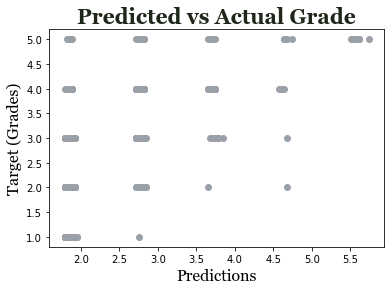

In [25]:
#actual vs predictions
predictions=results.predict()

plt.scatter(predictions,target)

plt.title("Predicted vs Actual Grade", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Predictions", fontsize=16,fontname="Georgia")
plt.ylabel("Target (Grades)", fontsize=16,fontname="Georgia")

plt.show()

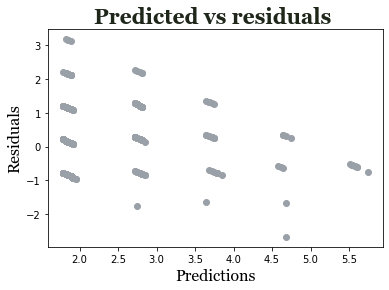

In [26]:
#residual plot

resids=target-predictions

plt.scatter(predictions,resids)

plt.title("Predicted vs residuals ", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Predictions", fontsize=16,fontname="Georgia")
plt.ylabel("Residuals", fontsize=16,fontname="Georgia")

plt.show()

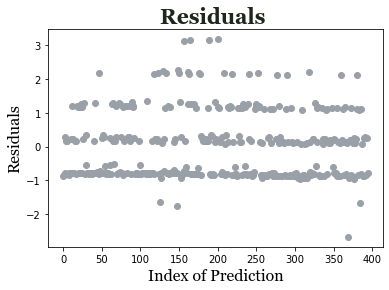

In [27]:
#residual plot
#want to see no correlation in your errors- want to see randomness 

resids=target-predictions

plt.scatter(range(len(resids)),resids)

plt.title("Residuals ", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Index of Prediction", fontsize=16,fontname="Georgia")
plt.ylabel("Residuals", fontsize=16,fontname="Georgia")

plt.show()

In [28]:
sub_df2=subset_df

sub_df2

,Gender,Age,Weekday_Consumption,Weekend_Consumption,Absences,Past_Class_Failures,Final_Grade_Math
0,F,18,1,1,6,0,6
1,F,17,1,1,4,0,6
2,F,15,2,3,10,3,10
3,F,15,1,1,2,0,15
4,F,16,1,2,4,0,10
...,...,...,...,...,...,...,...
390,M,20,4,5,11,2,9
391,M,17,3,4,3,0,16
392,M,21,3,3,3,3,7
393,M,18,3,4,0,0,10


In [29]:


sub_df2["Gender_number"]=subset_df["Gender"]
sub_df2['Gender_number'].replace({"F":0,"M":1},inplace=True)

# mask = sub_df2['Gender'] == 'M'
# sub_df2["Gender_number"] = sub_df2.loc[mask,'Gender'].replace('M',1)




sub_df2.head(20)

,Gender,Age,Weekday_Consumption,Weekend_Consumption,Absences,Past_Class_Failures,Final_Grade_Math,Gender_number
0,F,18,1,1,6,0,6,0
1,F,17,1,1,4,0,6,0
2,F,15,2,3,10,3,10,0
3,F,15,1,1,2,0,15,0
4,F,16,1,2,4,0,10,0
5,M,16,1,2,10,0,15,1
6,M,16,1,1,0,0,11,1
7,F,17,1,1,6,0,6,0
8,M,15,1,1,0,0,19,1
9,M,15,1,1,0,0,15,1


In [30]:
sub_df2.corr()

,Age,Weekday_Consumption,Weekend_Consumption,Absences,Past_Class_Failures,Final_Grade_Math,Gender_number
Age,1.000000,0.131125,0.117276,0.175230,0.243665,-0.161579,-0.028606
Weekday_Consumption,0.131125,1.000000,0.647544,0.111908,0.136047,-0.054660,0.268171
Weekend_Consumption,0.117276,0.647544,1.000000,0.136291,0.141962,-0.051939,0.274194
Absences,0.175230,0.111908,0.136291,1.000000,0.063726,0.034247,-0.066962
Past_Class_Failures,0.243665,0.136047,0.141962,0.063726,1.000000,-0.360415,0.044436
Final_Grade_Math,-0.161579,-0.054660,-0.051939,0.034247,-0.360415,1.000000,0.103456
Gender_number,-0.028606,0.268171,0.274194,-0.066962,0.044436,0.103456,1.000000


In [31]:
 target=subset_df["Weekday_Consumption"]
features=subset_df[["Age","Gender_number"]]


X = sm.add_constant(features)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Weekday_Consumption   R-squared:                       0.091
Model:                             OLS   Adj. R-squared:                  0.087
Method:                  Least Squares   F-statistic:                     19.67
Date:                 Wed, 11 Nov 2020   Prob (F-statistic):           7.25e-09
Time:                         18:45:06   Log-Likelihood:                -495.39
No. Observations:                  395   AIC:                             996.8
Df Residuals:                      392   BIC:                             1009.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3675      0.566     -0.650      0.516      -1.480       0.745
Age               0.0970      0.034      2.884      0.004       0.031       0.163
Gender_number     0.4849      0.086      5.650      0.000       0.316       0.654
==============================================================================
Omnibus:                      165.315   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.990
Skew:                           1.953   Prob(JB):                    2.26e-120
Kurtosis:                       7.269   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

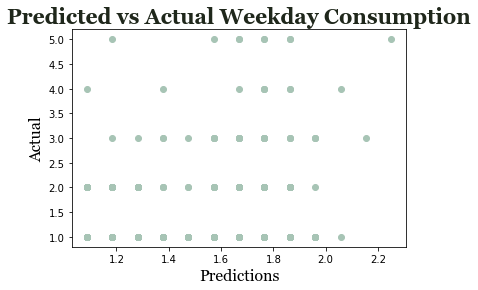

In [32]:
predictions=results.predict()

plt.scatter(predictions,target,color="#A7C4B5")

plt.title("Predicted vs Actual Weekday Consumption", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Predictions", fontsize=16,fontname="Georgia")
plt.ylabel("Actual", fontsize=16,fontname="Georgia")

plt.show()

y = 0.09x + -0.05


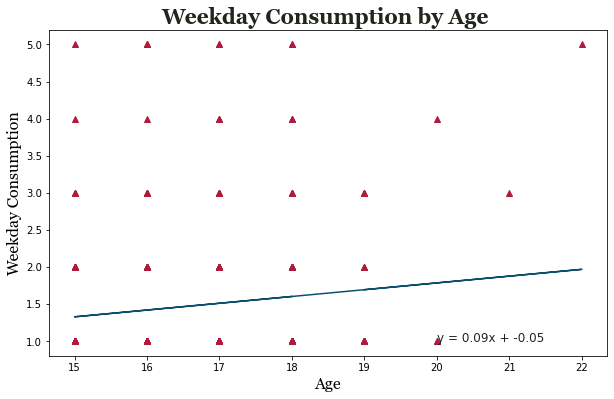

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(features.Age, target)
regress_values = features.Age * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(features.Age, target, color="#AF1B3F", marker="^")
plt.plot(features.Age,regress_values,"r-",color="#0B4F6C")

plt.title("Weekday Consumption by Age ", fontsize=21,fontweight='bold',fontname="Georgia",color="#1F271B")
plt.xlabel("Age", fontsize=16,fontname="Georgia")
plt.ylabel("Weekday Consumption", fontsize=16,fontname="Georgia")
plt.annotate(line_eq,(20,1),fontsize=12,color="#1F271B")

plt.show()
